In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [5]:
class neuralNetwork:
    def __init__(self, layers: tuple) -> None:
        self.L = len(layers)
        self.layers = layers
        self.W = []
        for i in range(self.L-1):
            self.W.append(np.random.normal(0,1,(layers[i+1],layers[i])))
        self.B = [np.random.normal(0,1,i) for i in layers[1:]]

In [7]:
def ReLU(n):
    return max(0, n)

def dReLU(n):
    return int(n>0)
# print(dReLU(100))

def sigmoid(n):
    if n<0:
        return 1 - 1 / (1 + math.exp(n))
    return 1 / (1 + math.exp(-1*n))

def dSigmoid(n):
    return sigmoid(n)*(1-sigmoid(n))

def cost(Y, Ytarget):
    return sum([(Y[i]-Ytarget[i])**2 for i in range(len(Ytarget))])

def dCost(Y, Ytarget):
    return [2*(Y[i]-Ytarget[i]) for i in range(len(Ytarget))]

def npArrMap(func: callable, npArr: np.ndarray):
    return np.array(list(map(func, npArr)))

In [11]:
def forwprop(network: neuralNetwork, X):
    A = []
    Z = []
    for i in range(network.L-1):
        Z.append(network.W[i].dot(X if i==0 else A[i-1]) + network.B[i])
        A.append(npArrMap(sigmoid, Z[i]))
    return Z, A

In [22]:
def backprop(network: neuralNetwork, Z, A, X, Y):
    dZ = [None] * (network.L-1)
    dW = [None] * (network.L-1)
    dB = [None] * (network.L-1)
    for i in range(network.L-1)[::-1]:
        dZ[i] = (dCost(A[i],Y) if i==network.L-2 else network.W[i+1].T.dot(dZ[i+1])) * npArrMap(dSigmoid,Z[i])
        dW[i] = np.outer(dZ[i],(X if i==0 else A[i-1]))
        dB[i] = dZ[i]
    return dW, dB

In [13]:
def train(network: neuralNetwork, dataX, dataY, learningRate=0.15, batchSize=20, epoch=40):
    batchNum = len(dataX)//batchSize
    dataX = np.reshape(dataX[: batchNum*batchSize],(batchNum, batchSize, -1))
    dataY = np.reshape(dataY[: batchNum*batchSize],(batchNum, batchSize, -1))
    for en in range(epoch):
        predictions = []
        for batch in range(batchNum):
            dWList = []
            dBList = []
            for i in range(batchSize):
                Z, A = forwprop(network, dataX[batch][i])
                predictions.append(int(A[-1].argmax() == dataY[batch][i].argmax()))
                dW, dB = backprop(network, Z, A, dataX[batch][i], dataY[batch][i])
                dWList.append(dW)
                dBList.append(dB)
            for i in range(network.L-1):
                network.W[i] -= learningRate * sum([dWList[j][i] for j in range(batchSize)]) / batchSize
                network.B[i] -= learningRate * sum([dBList[j][i] for j in range(batchSize)]) / batchSize

        print(f"epoch: {en+1}, accuracy: {sum(predictions)/len(predictions)}")

In [14]:
def test(network: neuralNetwork, dataX, dataY):
    predictions = []
    for i in range(len(dataX)):
        A = forwprop(network, dataX[i])[1]
        predictions.append(int(A[-1].argmax() == dataY[i].argmax()))
    print(f"accuracy: {sum(predictions)/len(predictions)}")

In [15]:
def getPrediction(network: neuralNetwork, X):
    return forwprop(network, X)[1][-1].argmax()

In [16]:
def oneHotEncode(labels: np.ndarray, size):
    return np.eye(size)[labels]

In [24]:
network1 = neuralNetwork((784, 20, 20, 10))

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
trainSize=60000
x_train = np.array(x_train)[:trainSize].reshape((trainSize,784)) / 255
y_train = oneHotEncode(np.array(y_train)[:trainSize], 10)
x_test = np.array(x_test)[:10000].reshape((10000,784)) / 255
y_test  = oneHotEncode(np.array(y_test)[:10000], 10)

In [27]:
train(network1, x_train, y_train, 0.15, 50, 40)
test(network1, x_test, y_test)

epoch: 1, accuracy: 0.31406666666666666
epoch: 2, accuracy: 0.5407333333333333
epoch: 3, accuracy: 0.6501833333333333
epoch: 4, accuracy: 0.7102
epoch: 5, accuracy: 0.7513833333333333
epoch: 6, accuracy: 0.7800833333333334
epoch: 7, accuracy: 0.80255
epoch: 8, accuracy: 0.8184833333333333
epoch: 9, accuracy: 0.8314166666666667
epoch: 10, accuracy: 0.84255
epoch: 11, accuracy: 0.8517666666666667
epoch: 12, accuracy: 0.8591666666666666
epoch: 13, accuracy: 0.86555
epoch: 14, accuracy: 0.8712
epoch: 15, accuracy: 0.8748666666666667
epoch: 16, accuracy: 0.8787333333333334
epoch: 17, accuracy: 0.8826166666666667
epoch: 18, accuracy: 0.8859333333333334
epoch: 19, accuracy: 0.8888833333333334
epoch: 20, accuracy: 0.8915
epoch: 21, accuracy: 0.89375
epoch: 22, accuracy: 0.8956166666666666
epoch: 23, accuracy: 0.8973166666666667
epoch: 24, accuracy: 0.89915
epoch: 25, accuracy: 0.9008666666666667
epoch: 26, accuracy: 0.9027166666666666
epoch: 27, accuracy: 0.9042666666666667
epoch: 28, accuracy

2 [2]


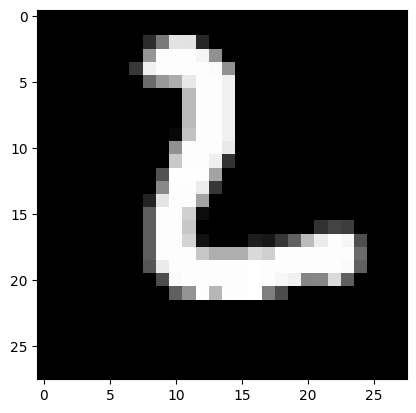

In [31]:
plt.imshow(np.reshape(x_test[1337], (28, 28)),cmap='gray')
print(getPrediction(network1, x_test[1337]), np.where(y_test[1337] == 1)[0])